# Basic Deep Learning Model using keras model in tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Dataset description

Fashion mnist, 70000 grayscale images, 10 categories, clothing images
Low resolution, 28 x 28 pixels
labels: 0 - 9, (Different types of clothing types)
Each image is mapped to a single image
60,000 training images, 10,000 test images

In [2]:
# Loaading datasets

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# For the purpose of visualization, we are considering the following

class_names = ['T-shirt/top', 'Trowser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

In [4]:
# Checking shape of training images

train_images.shape

(60000, 28, 28)

In [5]:
# Checking train label counts

len(train_labels)

60000

In [6]:
# Checking labels

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# Checking shape of testing images

test_images.shape

(10000, 28, 28)

In [8]:
# Checking test label counts

len(test_labels)

10000

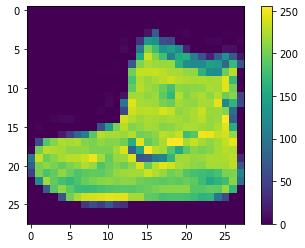

In [9]:
# Plotting an image

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Scaling images

train_images = train_images/ 255.0
test_images = test_images/ 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

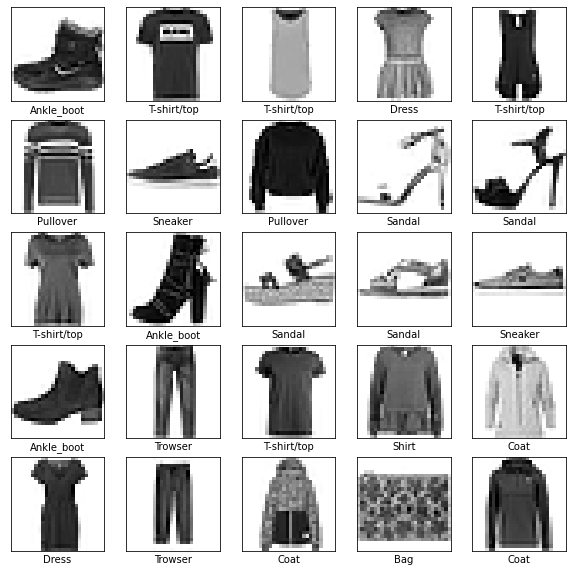

In [11]:
# Generating the figures

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

## Building the Neural Network
### Setup the layers

In [13]:
# Model definition

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Converts the 2 dimensional matrix valuse into 1D
    tf.keras.layers.Dense(128, activation = 'relu'), # Node count and activation function definition, hyperparameter
    tf.keras.layers.Dense(10) # Output layer nodes 10 because output label count is 10
])

 Compile the model (Loss function, Optimisation algorithm, Metrics to be used)

1. Loss Function - Used to identify the errors and reduce the loss/errors by adjusting weights
2. Optimizer - Algorithm on how to modify the weights after identifying the losses
3. Metrics - To what extent model is able to classify correctly

### Case 1: Compiling the model (from_logits = True)

In [15]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

### Training the model

In [18]:
model.fit(train_images, train_labels, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2298 - accuracy: 0.9135
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2237 - accuracy: 0.9164: 1s - loss: 0.2 - ETA: 0s - loss: 0.223 - ETA: 0s - loss: 0.2233 - 
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2155 - accuracy: 0.9189: 1s - loss: 0.2132 - accura - ETA: 1s - loss: 0.2 - ETA: 
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2104 - accuracy: 0.9214
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2031 - accuracy: 0.9243
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1968 - accuracy: 0.9263
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1924 - accuracy: 0.9275
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1861 - accuracy: 0.9297
Epoch 9/20
1875/1875 [==============================] - 3s

### How the model performs on the test set

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8852
Test accuracy: 0.885200023651123


### Case 2: From_logit = False, Using Softmax()

In [37]:
# Model in case of Logits = FALSE and softmax is applied

# Model definition

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Converts the 2 dimensional matrix valuse into 1D
    tf.keras.layers.Dense(128, activation = 'relu'), # Node count and activation function definition, hyperparameter
    tf.keras.layers.Dense(10), # Output layer nodes 10 because output label count is 10
    tf.keras.layers.Softmax()
])

### Compiling the model

In [23]:
model_2.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
             metrics = ['accuracy'])

### Model Training

In [24]:
model_2.fit(train_images, train_labels, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5023 - accuracy: 0.8238
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3784 - accuracy: 0.8639
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3378 - accuracy: 0.8776
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3152 - accuracy: 0.8841
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2922 - accuracy: 0.8927
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2799 - accuracy: 0.8965
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9013
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2575 - accuracy: 0.9052
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2508 - accuracy: 0.9064
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

### Model Performance on test set

In [25]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels, verbose = 1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8848
Test accuracy: 0.8848000168800354


### Retrieving probability values

In [26]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [30]:
predictions_prob = probability_model.predict(test_images)

In [32]:
predictions_prob[0]

array([6.18975357e-11, 1.00244157e-17, 5.48468487e-15, 2.51983098e-24,
       2.67636260e-12, 1.07718403e-08, 1.93060336e-20, 2.46114250e-05,
       1.02453184e-17, 9.99975324e-01], dtype=float32)

In [33]:
np.argmax(predictions_prob[0])

9

In [34]:
test_labels[0]

9

So prediction is in line with the actual model prediction. It takes the value with the maximum probability